#### set up

In [ ]:
!kaggle datasets download -d firqaaa/indonesian-vehicle-plate-numbers --path content/datasets --unzip

Dataset URL: https://www.kaggle.com/datasets/firqaaa/indonesian-vehicle-plate-numbers
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 97% 173M/179M [00:02<00:00, 64.0MB/s]
100% 179M/179M [00:02<00:00, 77.2MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
import joblib
from skimage.feature import hog
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
segmenting_model = '/content/drive/MyDrive/Projects/CompVis/FinalProject/OCR/HOG/hog_lreg_model_3.pkl'

In [ ]:
data_path = '/content/content/datasets/pics'

In [ ]:
len(os.listdir(data_path))

849

In [ ]:
strings = 'A1033HZ.PNG'
print(strings[:-4])

A1033HZ


In [ ]:
count_char = 0
count_dict = {}
for filename in os.listdir(data_path):
  files = filename[:-4]
  for char in files:
    count_char+=1
print(count_char)

5959


In [ ]:
test_ = '/content/content/datasets/pics/A1033HZ.PNG'

In [ ]:
clf = joblib.load(segmenting_model)

#### normal code

['A']
['G']
['2']
['G']
['Q']
['R']


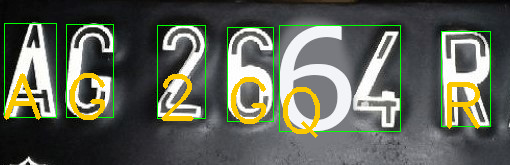

'AG2GQR'

In [ ]:
def ocr(PATH):
  im = cv2.imread(PATH)
  im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  im_gray = cv2.medianBlur(im_gray, 5)
  ret, im_th = cv2.threshold(im_gray, 120, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  ctrs, hier = cv2.findContours(im_th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  bboxes = [cv2.boundingRect(c) for c in ctrs]
  sorted_bboxes = sorted(bboxes, key=lambda b: b) # Sort by x-coordinate

  plate_char = []
  image_height, image_width = im.shape[:2]
  height_threshold = image_height * 0.3
  width_threshold = image_width * 0.3

  for num, i_bboxes in enumerate(sorted_bboxes):
    [x, y, w, h] = i_bboxes
    if h > height_threshold and w < width_threshold:
      cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 1)
      roi = im_gray[y:y + h, x:x + w]
      roi = cv2.resize(roi, (64, 128), interpolation=cv2.INTER_AREA)
      roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(1, 1))
      nbr = clf.predict(np.array([roi_hog_fd]))
      print(nbr)
      cv2.putText(im, str(nbr[0]), (x, y + h), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 200, 250), 3)
      plate_char.append(str(nbr[0]))
  cv2_imshow(im)
  return ''.join(plate_char)
ocr('/content/content/datasets/pics/AG2664R.PNG')

#### segment hog

In [ ]:
folder = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
PATH ='/content/test'
len(folder)
os.makedirs(PATH)

In [ ]:
for i in folder:
  os.makedirs(os.path.join(PATH, i))

In [ ]:
# # not to folder
# def segment_image(PATH, output_dir="test"):
#     # Read and preprocess the image
#     im = cv2.imread(PATH)
#     im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#     im_gray = cv2.GaussianBlur(im_gray, (5,5), 0)
#     ret, im_th = cv2.threshold(im_gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#     # Find contours
#     ctrs, hier = cv2.findContours(im_th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#     bboxes = [cv2.boundingRect(c) for c in ctrs]
#     sorted_bboxes = sorted(bboxes, key=lambda b: b[0])  # Sort by x-coordinate for left-to-right order

#     # Image dimensions for filtering small contours
#     image_height, image_width = im.shape[:2]
#     height_threshold = image_height * 0.3
#     width_threshold = image_width * 0.3

#     # Create output directory if it doesn't exist
#     os.makedirs(output_dir, exist_ok=True)

#     # Loop through detected bounding boxes and save each region of interest (ROI)
#     for num, (x, y, w, h) in enumerate(sorted_bboxes):
#         if h > height_threshold and w < width_threshold:
#             # Draw bounding box on the original image (optional)
#             cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 1)
#             # Extract and resize the ROI
#             roi = im_gray[y:y + h, x:x + w]
#             roi_resized = cv2.resize(roi, (64, 128), interpolation=cv2.INTER_AREA)
#             roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(1, 1))
#             nbr = clf.predict(np.array([roi_hog_fd]))
#             # Save the segmented ROI as an individual image
#             roi_filename = os.path.join(output_dir,nbr[0], f"segment_{nbr[0]}_{num}.png")
#             cv2.imwrite(roi_filename, roi_resized)

#     # Optionally, save the original image with bounding boxes drawn
#     # cv2.imwrite(os.path.join(output_dir, "image_with_boxes.png"), im)

#     # print(f"Segmentation completed. Segmented images are saved in '{output_dir}'.")

In [ ]:
def segment_image(PATH, clf=clf, output_dir="test"):
    # Read and preprocess the image
    im = cv2.imread(PATH)
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)
    ret, im_th = cv2.threshold(im_gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours
    ctrs, hier = cv2.findContours(im_th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    bboxes = [cv2.boundingRect(c) for c in ctrs]
    sorted_bboxes = sorted(bboxes, key=lambda b: b[0])  # Sort by x-coordinate for left-to-right order

    # Image dimensions for filtering small contours
    image_height, image_width = im.shape[:2]
    height_threshold = image_height * 0.3
    width_threshold = image_width * 0.3

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Loop through detected bounding boxes and save each region of interest (ROI)
    for num, (x, y, w, h) in enumerate(sorted_bboxes):
        if h > height_threshold and w < width_threshold:
            # Draw bounding box on the original image (optional)
            cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 1)

            # Extract and resize the ROI
            roi = im_gray[y:y + h, x:x + w]
            roi_resized = cv2.resize(roi, (64, 128), interpolation=cv2.INTER_AREA)

            # Calculate HOG features
            roi_hog_fd = hog(roi_resized, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(1, 1))

            # Predict using clf
            if roi_hog_fd.shape[0] == clf.n_features_in_:  # Check for feature consistency
                nbr = clf.predict(np.array([roi_hog_fd]))
                # Create output sub-directory for each class
                class_dir = os.path.join(output_dir, str(nbr[0]))
                os.makedirs(class_dir, exist_ok=True)

                # Save the segmented ROI as an individual image
                roi_filename = os.path.join(class_dir, f"segment_{nbr[0]}_{num}.png")
                cv2.imwrite(roi_filename, roi_resized)
            else:
                print(f"Feature size mismatch for bounding box {num}. Expected {clf.n_features_in_}, got {roi_hog_fd.shape[0]}")

    # Optionally, save the original image with bounding boxes drawn
    # cv2.imwrite(os.path.join(output_dir, "image_with_boxes.png"), im)

    print(f"Segmentation completed. Segmented images are saved in '{output_dir}'.")

# Example usage:
# segment_image('/path/to/image.png', clf, output_dir="output_segments")


In [ ]:
for i, filename in enumerate(os.listdir(data_path)):
  segment_image(os.path.join(data_path, filename))
  # print('done')
  print(f'{i}: done')
  # if i ==20:
  #   break

Segmentation completed. Segmented images are saved in 'test'.
0: done
Segmentation completed. Segmented images are saved in 'test'.
1: done
Segmentation completed. Segmented images are saved in 'test'.
2: done
Segmentation completed. Segmented images are saved in 'test'.
3: done
Segmentation completed. Segmented images are saved in 'test'.
4: done
Segmentation completed. Segmented images are saved in 'test'.
5: done
Segmentation completed. Segmented images are saved in 'test'.
6: done
Segmentation completed. Segmented images are saved in 'test'.
7: done
Segmentation completed. Segmented images are saved in 'test'.
8: done
Segmentation completed. Segmented images are saved in 'test'.
9: done
Segmentation completed. Segmented images are saved in 'test'.
10: done
Segmentation completed. Segmented images are saved in 'test'.
11: done
Segmentation completed. Segmented images are saved in 'test'.
12: done
Segmentation completed. Segmented images are saved in 'test'.
13: done
Segmentation com

In [ ]:
count=0
counter = {}
for i in os.listdir('/content/test'):
  count_file = 0
  for filename in os.listdir(os.path.join('/content/test', i)):
    count+=1
    count_file +=1
  counter[i]=count_file
print(count)
print(counter)

800
{'T': 20, 'C': 14, 'Y': 10, 'I': 5, '2': 29, 'E': 23, 'P': 7, '0': 30, 'J': 5, '1': 19, '6': 31, 'V': 16, 'U': 30, '5': 32, 'O': 38, 'R': 21, 'F': 17, '8': 32, '7': 25, 'K': 18, '9': 29, 'B': 26, 'D': 29, 'Q': 31, '3': 25, 'X': 16, 'G': 27, 'H': 23, 'A': 36, 'L': 12, 'S': 26, 'Z': 9, '4': 30, 'W': 12, 'N': 21, 'M': 26}


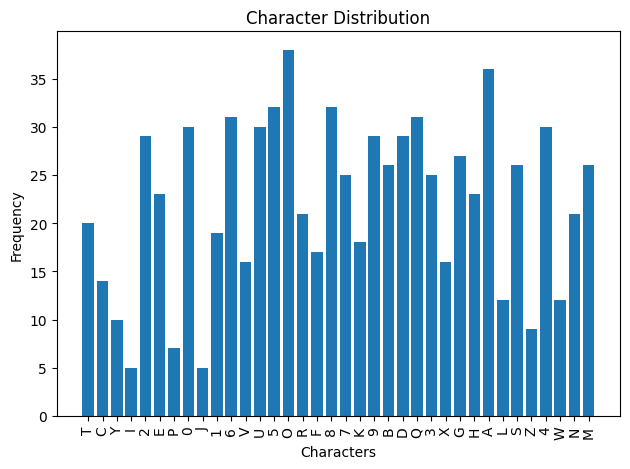

In [ ]:
keys = list(counter.keys())
values = list(counter.values())

# Create a bar chart
plt.bar(keys, values)
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.title('Character Distribution')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [ ]:
import zipfile
import os

# Define the path to the directory you want to zip
dir_path = '/content/test'

# Define the path to the output zip file
zip_path = '/content/output.zip'

# Create a ZipFile object
with zipfile.ZipFile(zip_path, 'w') as zip_file:
    # Walk through the directory and add files to the zip
    for root, dirs, files in os.walk(dir_path):
        for file in files:
            file_path = os.path.join(root, file)
            rel_path = os.path.relpath(file_path, start=os.path.dirname(dir_path))
            zip_file.write(file_path, rel_path)

print(f"Zip file created at {zip_path}")

Zip file created at /content/output.zip


#### segment easyOCR

In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 23.8 MB/s eta 0:00:00


In [ ]:
import cv2
import os
import numpy as np
import easyocr

def segment_image_easyocr(PATH, output_dir="test3"):
    # Initialize EasyOCR Reader (you may specify languages)
    reader = easyocr.Reader(['en'])  # Add additional languages as needed

    # Read and preprocess the image
    im = cv2.imread(PATH)
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)
    ret, im_th = cv2.threshold(im_gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours
    ctrs, hier = cv2.findContours(im_th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    bboxes = [cv2.boundingRect(c) for c in ctrs]
    sorted_bboxes = sorted(bboxes, key=lambda b: b[0])  # Sort by x-coordinate for left-to-right order

    # Image dimensions for filtering small contours
    image_height, image_width = im.shape[:2]
    height_threshold = image_height * 0.3
    width_threshold = image_width * 0.3

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Loop through detected bounding boxes and save each region of interest (ROI)
    for num, (x, y, w, h) in enumerate(sorted_bboxes):
        if h > height_threshold and w < width_threshold:
            # Draw bounding box on the original image (optional)
            cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 1)

            # Extract ROI
            roi = im_gray[y:y + h, x:x + w]

            # Use EasyOCR to read text in the ROI
            ocr_result = reader.readtext(roi)

            # Process OCR results if any text was detected
            if ocr_result:
                text = ocr_result[0][-2]  # Extract the recognized text from the result
                # print(f"Detected text: {text}")
                text = text.upper()
                # Create output sub-directory for each character or text class
                class_dir = os.path.join(output_dir, str(text))
                os.makedirs(class_dir, exist_ok=True)

                # Save the segmented ROI as an individual image
                roi_filename = os.path.join(class_dir, f"segment_{text}_{num}.png")
                cv2.imwrite(roi_filename, roi)
            # else:
                # print(f"No text detected for bounding box {num}.")

    # Optionally, save the original image with bounding boxes drawn
    # cv2.imwrite(os.path.join(output_dir, "image_with_boxes.png"), im)

    # print(f"Segmentation completed. Segmented images are saved in '{output_dir}'.")

# Example usage:
# segment_image(test_, output_dir="output_segments")

In [ ]:
segment_image_easyocr(test_, output_dir="output_segments")

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
for i, filename in enumerate(os.listdir(data_path)):
  segment_image_easyocr(os.path.join(data_path, filename))
  # print('done')
  print(f'{i}: done')

0: done
1: done
2: done
3: done
4: done
5: done
6: done
7: done
8: done
9: done
10: done
11: done
12: done
13: done
14: done
15: done
16: done
17: done
18: done
19: done
20: done
21: done
22: done
23: done
24: done
25: done
26: done
27: done
28: done
29: done
30: done
31: done
32: done
33: done
34: done
35: done
36: done
37: done
38: done
39: done
40: done
41: done
42: done
43: done
44: done
45: done
46: done
47: done
48: done
49: done
50: done
51: done
52: done
53: done
54: done
55: done
56: done
57: done
58: done
59: done
60: done
61: done
62: done
63: done
64: done
65: done
66: done
67: done
68: done
69: done
70: done
71: done
72: done
73: done
74: done
75: done
76: done
77: done
78: done
79: done
80: done
81: done
82: done
83: done
84: done
85: done
86: done
87: done
88: done
89: done
90: done
91: done
92: done
93: done
94: done
95: done
96: done
97: done
98: done
99: done
100: done
101: done
102: done
103: done
104: done
105: done
106: done
107: done
108: done
109: done
110: done


In [ ]:
count=0
counter = {}
for i in os.listdir('/content/test3'):
  count_file = 0
  for filename in os.listdir(os.path.join('/content/test3', i)):
    count+=1
    count_file +=1
  counter[i]=count_file
print(count)
print(counter)

663
{'Z': 1, '84': 1, '25': 1, '2': 29, '0': 34, '30': 1, 'F': 15, 'S': 11, '55': 1, 'Y': 9, 'P': 9, '9': 26, '56': 1, '5 ': 2, 'VN': 1, '7': 13, '14': 1, '3': 24, '22': 1, '0=': 1, '^': 1, '8': 29, '26': 1, 'HP': 1, 'HI': 1, 'T': 12, '6 _': 1, '8)': 1, '57': 1, '6=': 1, '19': 1, 'C': 13, '82': 1, 'B': 17, 'A': 27, '15': 1, '00': 2, 'OT': 1, '8 ': 1, 'N': 13, 'CG': 1, 'DK': 1, '4L': 1, 'V': 13, 'I': 13, '624': 1, '64': 1, 'PK': 1, 'M': 17, 'R': 21, 'G': 6, '8=': 1, '4_': 6, 'L4': 1, 'K': 16, '1': 23, '@': 1, 'BC': 1, 'X': 11, '2 ': 1, 'R-': 1, 'E': 11, "'1": 1, '6 ': 1, 'J': 9, '6': 29, 'D': 9, 'H': 22, '(': 3, '122': 1, 'LL_': 1, '[': 1, 'H2': 1, '.ipynb_checkpoints': 0, '4': 18, 'L8': 1, '5': 33, '3=': 1, '87': 1, '36': 1, 'BA': 4, 'U': 25, 'L': 28, 'W': 11, 'O': 5}


In [ ]:
import zipfile
import os

# Define the path to the directory you want to zip
dir_path = '/content/test3'

# Define the path to the output zip file
zip_path = '/content/output.zip'

# Create a ZipFile object
with zipfile.ZipFile(zip_path, 'w') as zip_file:
    # Walk through the directory and add files to the zip
    for root, dirs, files in os.walk(dir_path):
        for file in files:
            file_path = os.path.join(root, file)
            rel_path = os.path.relpath(file_path, start=os.path.dirname(dir_path))
            zip_file.write(file_path, rel_path)

print(f"Zip file created at {zip_path}")

Zip file created at /content/output.zip
